# Ex1

In [14]:
import pyod
data = pyod.utils.data.generate_data(n_train=300, n_test=200, contamination=0.15, n_features=3)
X_train, X_test, y_train, y_test = data
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(300, 3) (200, 3)
(300,) (200,)


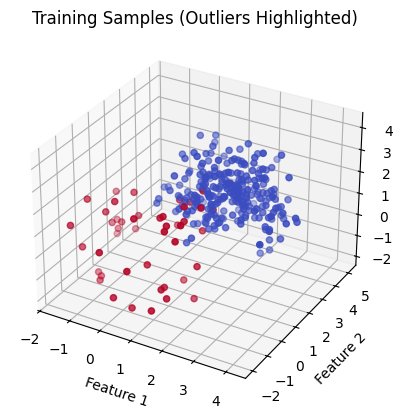

In [15]:
# plot data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Training Samples (Outliers Highlighted)')
plt.show()

In [16]:
from pyod.models.ocsvm import OCSVM
model = OCSVM(kernel='linear', contamination=0.15)
model.fit(X_train)
predictions_test = model.predict(X_test)

In [17]:
# function to print metrics, BA, ROC, AUC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
def print_metrics(y_true, y_pred, y_scores, model_name):
    ba = balanced_accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)
    print(f"{model_name} - Balanced Accuracy: {ba:.4f}, AUC: {auc:.4f}")

In [18]:
print_metrics(y_test, predictions_test, model.decision_function(X_test), "OCSVM")

OCSVM - Balanced Accuracy: 0.9686, AUC: 0.9847


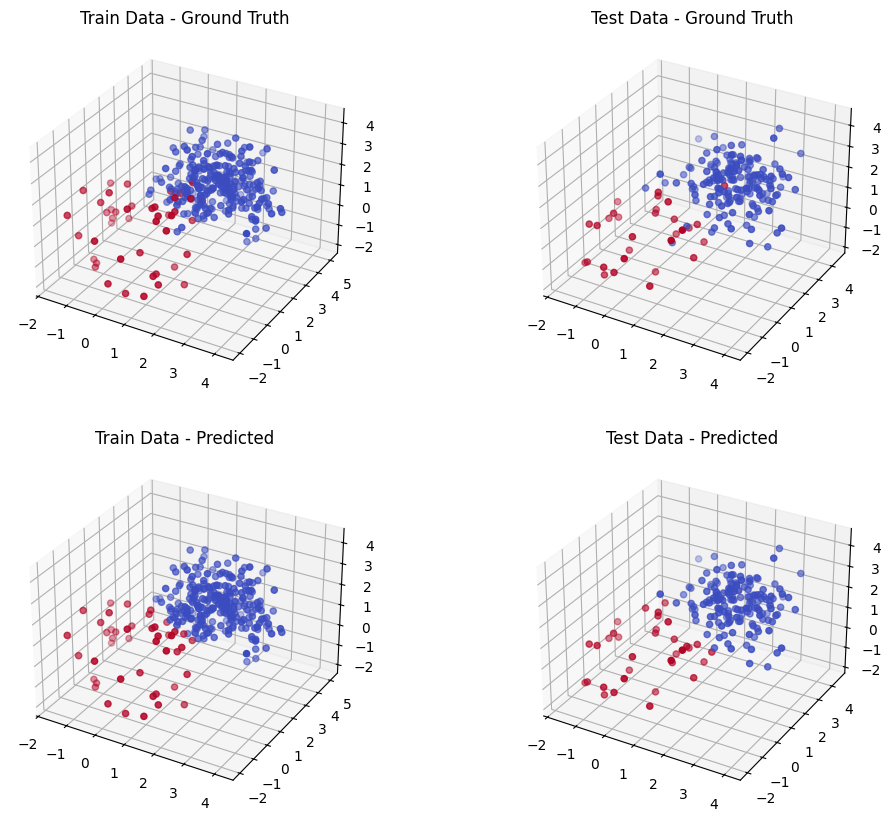

In [19]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='coolwarm')
ax1.set_title('Train Data - Ground Truth')
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:,2], c=y_test, cmap='coolwarm')
ax2.set_title('Test Data - Ground Truth')
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(X_train[:, 0], X_train[:, 1], X_train[:,2], c=model.predict(X_train), cmap='coolwarm')
ax3.set_title('Train Data - Predicted')
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(X_test[:, 0], X_test[:, 1], X_test[:,2], c=predictions_test, cmap='coolwarm')
ax4.set_title('Test Data - Predicted')
plt.show()

In [20]:
# rbf kerner
model_rbf = OCSVM(kernel='rbf', contamination=0.15)
model_rbf.fit(X_train)
predictions_test_rbf = model_rbf.predict(X_test)
print_metrics(y_test, predictions_test_rbf, model_rbf.decision_function(X_test), "OCSVM RBF")

OCSVM RBF - Balanced Accuracy: 0.8314, AUC: 0.9275


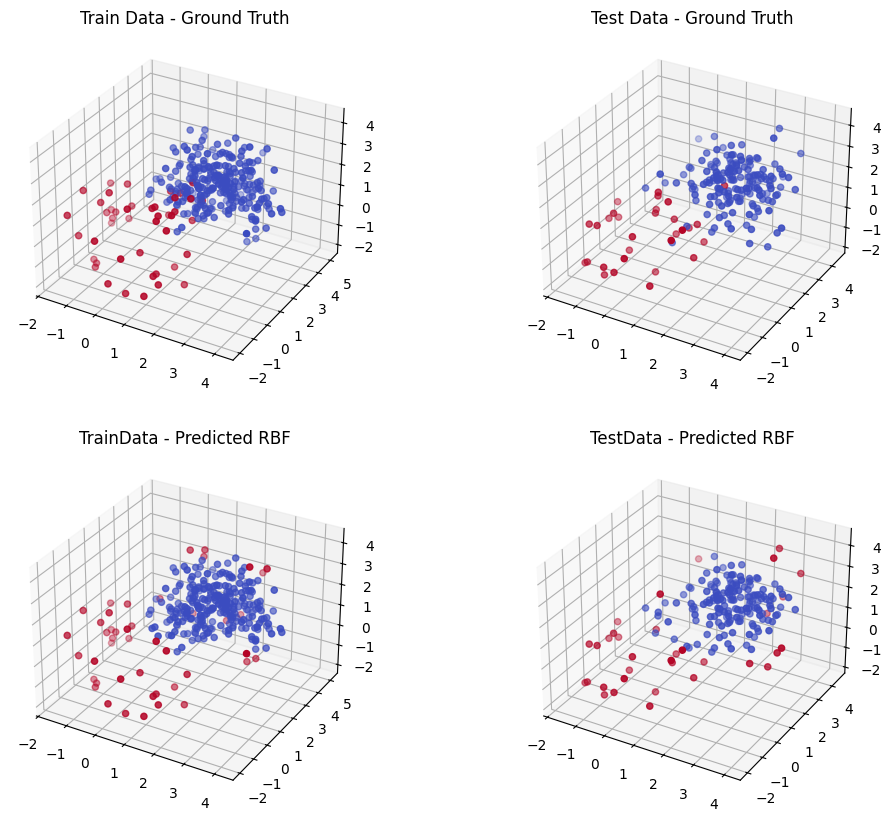

In [21]:
# plot decision boundary for rbf
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(X_train[:, 0], X_train[:, 1], X_train[:,2], c=y_train, cmap='coolwarm')
ax1.set_title('Train Data - Ground Truth')
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:,2], c=y_test, cmap='coolwarm')
ax2.set_title('Test Data - Ground Truth')
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(X_train[:, 0], X_train[:, 1], X_train[:,2], c=model_rbf.predict(X_train), cmap='coolwarm')
ax3.set_title('TrainData - Predicted RBF')
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(X_test[:, 0], X_test[:, 1], X_test[:,2], c=predictions_test_rbf, cmap='coolwarm')
ax4.set_title('TestData - Predicted RBF')
plt.show()

In [22]:
# deep svd
from pyod.models.deep_svdd import DeepSVDD
model_dsvdd = DeepSVDD(contamination=0.15, epochs=30, n_features=3)
model_dsvdd.fit(X_train)
predictions_test_dsvdd = model_dsvdd.predict(X_test)
print_metrics(y_test, predictions_test_dsvdd, model_dsvdd.decision_function(X_test), "Deep SVDD")

Epoch 1/30, Loss: 10.979899883270264
Epoch 2/30, Loss: 10.898526132106781
Epoch 3/30, Loss: 11.201597571372986
Epoch 4/30, Loss: 11.28466546535492
Epoch 5/30, Loss: 11.691493034362793
Epoch 6/30, Loss: 11.055381715297699
Epoch 7/30, Loss: 10.808062553405762
Epoch 8/30, Loss: 11.16451096534729
Epoch 9/30, Loss: 10.970802307128906
Epoch 10/30, Loss: 11.071645498275757
Epoch 11/30, Loss: 10.981719970703125
Epoch 12/30, Loss: 11.087197363376617
Epoch 13/30, Loss: 11.308060646057129
Epoch 14/30, Loss: 11.215357482433319
Epoch 15/30, Loss: 10.748386204242706
Epoch 16/30, Loss: 11.103018999099731
Epoch 17/30, Loss: 11.618581056594849
Epoch 18/30, Loss: 11.304056763648987
Epoch 19/30, Loss: 12.011783838272095
Epoch 20/30, Loss: 11.363134503364563
Epoch 21/30, Loss: 11.373605906963348
Epoch 22/30, Loss: 11.308169066905975
Epoch 23/30, Loss: 11.537115812301636
Epoch 24/30, Loss: 10.663125395774841
Epoch 25/30, Loss: 10.927386224269867
Epoch 26/30, Loss: 10.87887591123581
Epoch 27/30, Loss: 10.85

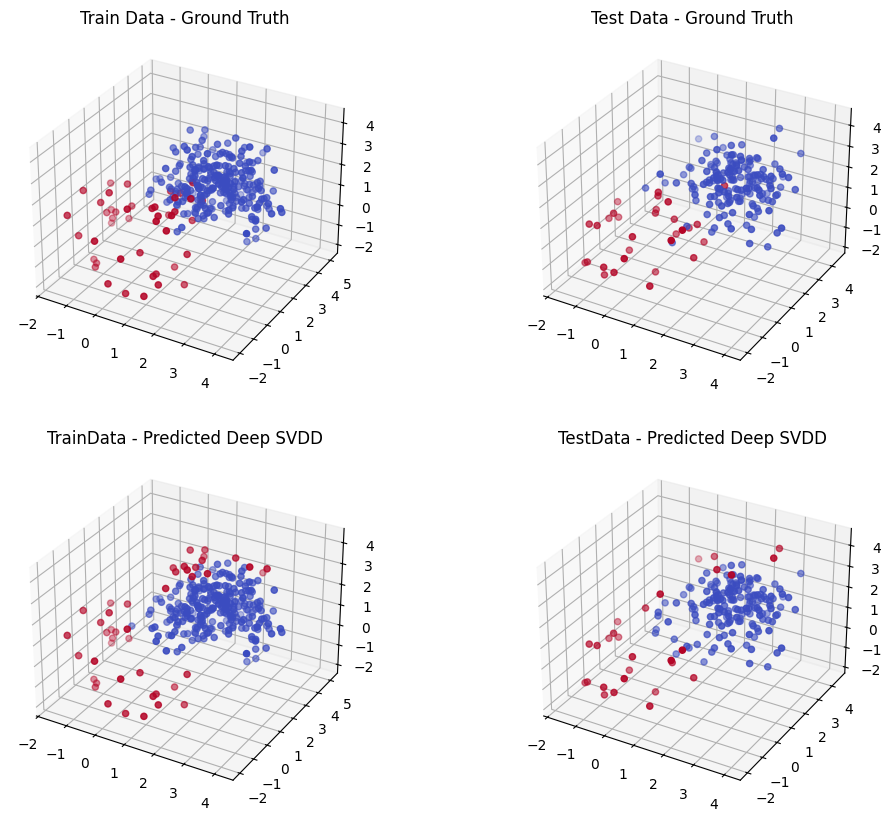

In [23]:
# plot decision boundary for deep svdd
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(X_train[:, 0], X_train[:, 1], X_train[:,2], c=y_train, cmap='coolwarm')
ax1.set_title('Train Data - Ground Truth')
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:,2], c=y_test, cmap='coolwarm')
ax2.set_title('Test Data - Ground Truth')
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(X_train[:, 0], X_train[:, 1], X_train[:,2], c=model_dsvdd.predict(X_train), cmap='coolwarm')
ax3.set_title('TrainData - Predicted Deep SVDD')
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(X_test[:, 0], X_test[:, 1], X_test[:,2], c=predictions_test_dsvdd, cmap='coolwarm')
ax4.set_title('TestData - Predicted Deep SVDD')
plt.show()

# Ex2

In [50]:
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score
import scipy.io
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV


data = scipy.io.loadmat('cardio.mat')
X = data['X']
y_pyod = data['y'].ravel()  # 0=inlier, 1=outlier (pyod format)

# 2. Convert ground truth from pyod format (0/1) to sklearn OC-SVM format (1 / -1)
#    0 -> 1 (inlier), 1 -> -1 (outlier)
y = 1 - 2 * y_pyod

# 3. Train / test split: 40% train, 60% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(732, 21) (1099, 21)
(732,) (1099,)


In [51]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ocsvm', OneClassSVM())
])

contamination_train = np.mean(y_train == -1)

In [52]:
param_grid = [
    {
        'ocsvm__kernel': ['linear'],
        'ocsvm__nu': [0.01, contamination_train, 0.3, 0.5],
    },
    {
        'ocsvm__kernel': ['rbf', 'sigmoid'],
        'ocsvm__gamma': ['scale', 'auto', 0.01, 0.1, 1.0],
        'ocsvm__nu': [0.01, contamination_train, 0.3, 0.5],
    }
]

In [53]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


,estimator,Pipeline(step...eClassSVM())])
,param_grid,"[{'ocsvm__kernel': ['linear'], 'ocsvm__nu': [0.01, np.float64(0....2841530054644), ...]}, {'ocsvm__gamma': ['scale', 'auto', ...], 'ocsvm__kernel': ['rbf', 'sigmoid'], 'ocsvm__nu': [0.01, np.float64(0....2841530054644), ...]}]"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [54]:
best_model = grid.best_estimator_
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)

# 9. Fit best model on entire training set (GridSearchCV already does this, but explicit refit is fine)
best_model.fit(X_train, y_train)

# 10. Evaluate on test set using Balanced Accuracy
y_pred_test = best_model.predict(X_test)  # predictions: 1=inlier, -1=outlier
ba_test = balanced_accuracy_score(y_test, y_pred_test)
print(f"Balanced Accuracy on test set with best parameters: {ba_test:.4f}")

Best parameters found by GridSearchCV:
{'ocsvm__gamma': 0.01, 'ocsvm__kernel': 'rbf', 'ocsvm__nu': 0.3}
Balanced Accuracy on test set with best parameters: 0.8823


# Ex3

In [55]:
data = scipy.io.loadmat('shuttle.mat')
X = data['X']          # features
y = data['y'].ravel()  # labels in pyod format: 0=inlier, 1=outlier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(24548, 9) (24549, 9)
(24548,) (24549,)


In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
def print_metrics(y_true, y_pred, y_scores, model_name):
    ba = balanced_accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)
    print(f"{model_name} - Balanced Accuracy: {ba:.4f}, AUC: {auc:.4f}")

In [60]:
contamination_train = np.mean(y_train == 1)

ocsvm_linear = OCSVM(kernel='linear', contamination=contamination_train)
ocsvm_linear.fit(X_train_scaled)
y_pred_lin = ocsvm_linear.predict(X_test_scaled)  # 0/1 in pyod format
scores_lin = ocsvm_linear.decision_function(X_test_scaled)
print_metrics(y_test, y_pred_lin, scores_lin, "OCSVM linear")

OCSVM linear - Balanced Accuracy: 0.7422, AUC: 0.7636


In [61]:
# rbf kernel
ocsvm_rbf = OCSVM(kernel='rbf', contamination=contamination_train)
ocsvm_rbf.fit(X_train_scaled)
y_pred_rbf = ocsvm_rbf.predict(X_test_scaled)
scores_rbf = ocsvm_rbf.decision_function(X_test_scaled)
print_metrics(y_test, y_pred_rbf, scores_rbf, "OCSVM rbf")

OCSVM rbf - Balanced Accuracy: 0.9747, AUC: 0.9914


In [65]:
print(X.shape)

(49097, 9)


In [71]:
n_features = X_train_scaled.shape[1]

base_kwargs = dict(
    contamination=contamination_train,
    epochs=30,
    batch_size=256,
    verbose=1,
    n_features=n_features
)

In [72]:
deep_svdd_1 = DeepSVDD(hidden_neurons=[64, 32], **base_kwargs)
deep_svdd_1.fit(X_train_scaled)
y_pred_d1 = deep_svdd_1.predict(X_test_scaled)
scores_d1 = deep_svdd_1.decision_function(X_test_scaled)
print_metrics(y_test, y_pred_d1, scores_d1, "DeepSVDD [64, 32]")

Epoch 1/30, Loss: 75.00057169795036
Epoch 2/30, Loss: 75.00253564119339
Epoch 3/30, Loss: 75.01268193125725
Epoch 4/30, Loss: 75.00811740756035
Epoch 5/30, Loss: 75.00797846913338
Epoch 6/30, Loss: 75.03230604529381
Epoch 7/30, Loss: 75.02579763531685
Epoch 8/30, Loss: 75.24970424175262
Epoch 9/30, Loss: 74.99141219258308
Epoch 10/30, Loss: 74.99452966451645
Epoch 11/30, Loss: 75.19222888350487
Epoch 12/30, Loss: 75.00564241409302
Epoch 13/30, Loss: 75.00242653489113
Epoch 14/30, Loss: 75.25803941488266
Epoch 15/30, Loss: 75.1428140103817
Epoch 16/30, Loss: 74.9991503059864
Epoch 17/30, Loss: 74.99003154039383
Epoch 18/30, Loss: 75.06266468763351
Epoch 19/30, Loss: 74.99663284420967
Epoch 20/30, Loss: 74.99368751049042
Epoch 21/30, Loss: 75.44289046525955
Epoch 22/30, Loss: 75.01661425828934
Epoch 23/30, Loss: 75.00324979424477
Epoch 24/30, Loss: 75.00700378417969
Epoch 25/30, Loss: 75.00717777013779
Epoch 26/30, Loss: 75.0113705098629
Epoch 27/30, Loss: 75.14424073696136
Epoch 28/30, 

In [73]:
deep_svdd_2 = DeepSVDD(hidden_neurons=[128, 64, 32], **base_kwargs)
deep_svdd_2.fit(X_train_scaled)
y_pred_d2 = deep_svdd_2.predict(X_test_scaled)
scores_d2 = deep_svdd_2.decision_function(X_test_scaled)
print_metrics(y_test, y_pred_d2, scores_d2, "DeepSVDD [128, 64, 32]")

Epoch 1/30, Loss: 14.052202343940735
Epoch 2/30, Loss: 13.694305650889874
Epoch 3/30, Loss: 13.780377827584743
Epoch 4/30, Loss: 13.749061442911625
Epoch 5/30, Loss: 13.562176950275898
Epoch 6/30, Loss: 14.478052608668804
Epoch 7/30, Loss: 13.896715603768826
Epoch 8/30, Loss: 13.734631277620792
Epoch 9/30, Loss: 13.628139667212963
Epoch 10/30, Loss: 13.65450306981802
Epoch 11/30, Loss: 14.226938858628273
Epoch 12/30, Loss: 14.23015633970499
Epoch 13/30, Loss: 13.95517534762621
Epoch 14/30, Loss: 13.834736481308937
Epoch 15/30, Loss: 13.505763612687588
Epoch 16/30, Loss: 13.474882535636425
Epoch 17/30, Loss: 13.918832883238792
Epoch 18/30, Loss: 14.188937298953533
Epoch 19/30, Loss: 14.068156212568283
Epoch 20/30, Loss: 13.370531357824802
Epoch 21/30, Loss: 13.543355263769627
Epoch 22/30, Loss: 13.994131051003933
Epoch 23/30, Loss: 13.719536580145359
Epoch 24/30, Loss: 13.843563243746758
Epoch 25/30, Loss: 14.018357142806053
Epoch 26/30, Loss: 13.330768272280693
Epoch 27/30, Loss: 13.93